# Imports

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib
from matplotlib import cm
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

matplotlib.style.use('ggplot')
%matplotlib notebook
import mpld3
mpld3.enable_notebook()

## Retrieve Data

In [4]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

/Users/Jojo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Exploration

In [5]:
train_data.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [35]:
train_data.head(30)

,id,qid1,qid2,question1,question2,is_duplicate,q1l,q2l,repeats
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13,5
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7,2
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,16,16,8
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,4,11,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9,4
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,8,8,6
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,9,9,3


# Baseline model

In [7]:
# feature: words per question

def count_words(question):
    question = str(question)
    words = question.split()
    return len(words)

train_data["q1l"] = train_data["question1"].apply(count_words)
train_data["q2l"] = train_data["question2"].apply(count_words)
test_data["q1l"] = test_data["question1"].apply(count_words)
test_data["q2l"] = test_data["question2"].apply(count_words)

In [8]:
# feature: repeated words per question

def count_repeats(row):
    q1 = str(row['question1']).lower()
    q2 = str(row['question2']).lower()
    
    w1 = q1.split()
    w2 = q2.split()
    
    count = 0
    
    if len(w1) > len(w2):
        for word in w1:
            if word in w2:
                count = count + 1
    else:
        for word in w2:
            if word in w1:
                count = count + 1
    
    return count

train_data["repeats"] = train_data.apply(count_repeats, axis=1)
test_data["repeats"] = test_data.apply(count_repeats, axis=1)

##### Initial Test

In [9]:
tp = 0
tn = 0
fp = 0
fn = 0

for index, row in train_data.iterrows():
    if (row['repeats']/row['q1l'] + row['repeats']/row['q2l'])/2 >= 0.5:
        if row['is_duplicate'] == 1:
            tp = tp + 1
        else:
            fp = fp + 1
    else:
        if row['is_duplicate'] == 1:
            fn = fn + 1
        else:
            tn = tn + 1

In [10]:
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives: ", tp)
print("True negatives: ", tn)

Accuracy:  0.6695490860520913
False positives:  87292
False negatives:  46306
True positives:  102957
True negatives:  167735


#### Results Visualization

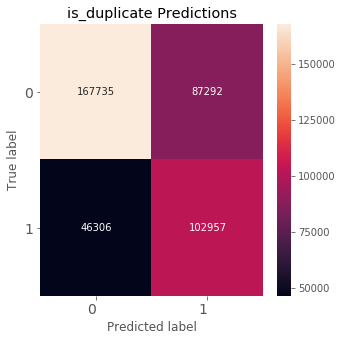

In [63]:
plt.figure(figsize=[5,5])
heatmap = sb.heatmap([[tn,fp],[fn,tp]], annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("is_duplicate Predictions")
plt.show()

##### Test with equal sample size

In [81]:
g = train_data.groupby('is_duplicate')
g = g.apply(lambda x: x.sample(g.size().min()))
g

id    qid1    qid2  \
is_duplicate                                  
0            183341  183341  280393  280394   
             183213  183213  280218  280219   
             149486  149486  235462  235463   
             219184  219184  258718  325985   
             89754    89754  150737  150738   
             314573  314573  439320  439321   
             223790  223790  172896  151601   
             276943  276943  395959  395960   
             397426  397426  164301  530549   
             172008  172008  265694  265695   
             314        314     628     629   
             95879    95879  159809  159810   
             53815    53815   95076   95077   
             73283    73283  125769  125770   
             216832  216832  197747  323059   
             326161  326161   65237  452437   
             388004  388004  465895  520350   
             90396    90396  151689  151690   
             302470  302470  425485  425486   
             283634  283634  403765  403766   
             51085    51085   90659   90660   
             215182  215182   92521   56576   
             207184  207184  310808   14063   
             19530    19530   36901   36902   
             349115  349115  477755  477756   
             257808  257808  373208  373209   
             155560  155560   73929  243684   
             4234      4234    8372    8373   
             393558  393558  526372  526373   
             29648    29648   54830   54831   
...                     ...     ...     ...   
1            67884    67884   31894   48522   
             126876  126876  204388  204389   
             318434  318434   35301   65693   
             98554    98554  151413  163753   
             6305      6305   12359   12360   
             85578    85578  144458  144459   
             225112  225112  333377  333378   
             50177    50177   43840    5988   
             370310  370310   74700   62920   
             342825  342825  470850  470851   
             79015    79015  134626  134627   
             360801  360801  284103  472159   
             223457  223457  331265  331266   
             78509    78509  133854    3374   
             139441  139441   10033   16073   
             77072    77072   51617   12717   
             117552  117552  191263  191264   
             54531    54531   57356   96254   
             175530  175530   12400   80619   
             158033  158033   23171   83393   
             266495  266495  255661  364812   
             262993  262993  114241     252   
             39150    39150   71007   71008   
             351393  351393  232306   83331   
             10242    10242    1961   13430   
             24714    24714   46134   46135   
             280427  280427   44331   32200   
             175523  175523  270233  270234   
             27186    27186   50523   50524   
             173493  173493  267639  267640   

                                                             question1  \
is_duplicate                                                             
0            183341  After doing something worthy of acknowledgemen...   
             183213                    What is the IP address of NASA?   
             149486  Which is the best book for Data Structures and...   
             219184  What is the short whistle sound that we hear w...   
             89754   How long should I wait to ask a woman out afte...   
             314573            What does a false conviction feel like?   
             223790  How would you compare the United States' eutha...   
             276943  Is there a chance for anyone on Quora to have ...   
             397426  Which games on PS4 support 2 player split-screen?   
             172008                             What is Nikolayev gas?   
             314                    Can anyone predict my birth chart?   
             95879   A and B can finish a work together in 12 days,...   
             53815   Should

In [90]:
trp = 0
trn = 0
fap = 0
fan = 0

for i, row in g.iterrows():
    if (row['repeats']/row['q1l'] + row['repeats']/row['q2l'])/2 >= 0.5:
        if row['is_duplicate'] == 1:
            trp = trp + 1
        else:
            fap = fap + 1
            if fap < 15:
                print("False positive:")
                print(row['question1'])
                print(row['question2'])
                print(" ")
    else:
        if row['is_duplicate'] == 1:
            fan = fan + 1
            if fan < 15:
                print("False Negative:")
                print(row['question1'])
                print(row['question2'])
                print(" ")
        else:
            trn = trn + 1

False positive:
What is the IP address of NASA?
What is an IP address?
 
False positive:
How long should I wait to ask a woman out after meeting her?
I ask for a second chance from my girlfriend she rejected me, it is still possible to ask again? How long should I wait until I can ask her again?
 
False positive:
How would you compare the United States' euthanasia laws to Netherlands?
How would you compare the United States' euthanasia laws to Denmark?
 
False positive:
What is Nikolayev gas?
What is nerve gas?
 
False positive:
A and B can finish a work together in 12 days, and B and C together in 16 days. If A alone works for 5 days and then B alone continues for 7 days, then remaining work is done by C in 13 days. In how many days can C alone finish the complete work?
If 3 men or 4 women can do a piece of work in 16 days, in how many days can 12 men and 8 women do the same piece of work?
 
False positive:
Which programing language is used to creat an app?
Which programming language 

In [85]:
print("Accuracy: ", (trp+trn)/(trp+trn+fap+fan))
print("False positives: ", fap)
print("False negatives: ", fan)
print("True positives: ", trp)
print("True negatives: ", trn)

Accuracy:  0.6738073065662622
False positives:  51071
False negatives:  46306
True positives:  102957
True negatives:  98192


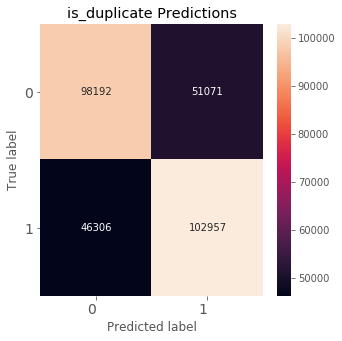

In [86]:
plt.figure(figsize=[5,5])
heatmap2 = sb.heatmap([[trn,fap],[fan,trp]], annot=True, fmt="d")
heatmap2.yaxis.set_ticklabels(heatmap2.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap2.xaxis.set_ticklabels(heatmap2.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("is_duplicate Predictions")
plt.show()

### Ready train/validation

In [11]:
features = ["repeats", "q1l", "q2l"]

X = train_data[features]
y = train_data["is_duplicate"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33)

### Random Forest Classifier

0.7006655873358518


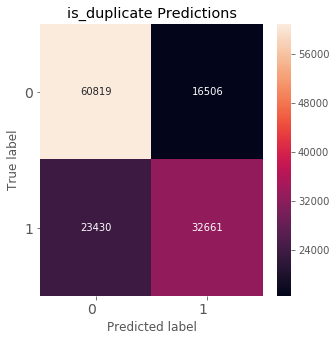

In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_val)
rfc_cm = confusion_matrix(rfc_predict, y_val)
print(accuracy_score(rfc_predict, y_val))

plt.figure(figsize=[5,5])
heatmap = sb.heatmap(rfc_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("is_duplicate Predictions")
plt.show()

## Data Visualization

In [33]:
print(len(train_data[train_data['is_duplicate'] == 1]))
print(len(train_data[train_data['is_duplicate'] == 0]))
print(len(train_data))
print(len(test_data))

149263
255027
404290
3563475


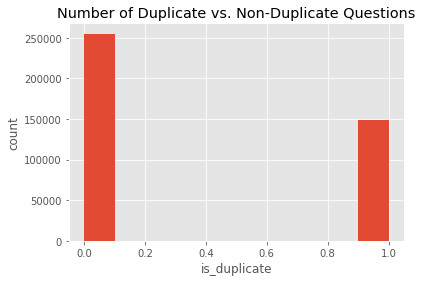

In [31]:
plt.figure()
plt.hist(train_data['is_duplicate'])
plt.xlabel("is_duplicate")
plt.ylabel("count")
plt.title("Number of Duplicate vs. Non-Duplicate Questions")
plt.show()

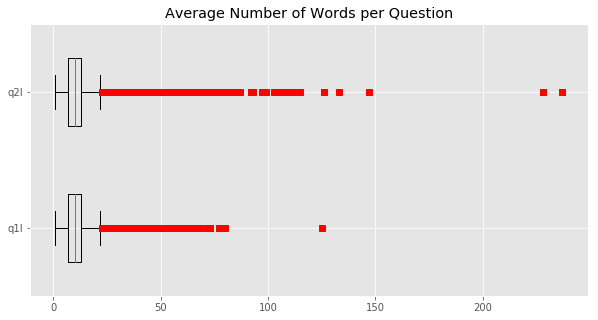

In [58]:
data = [train_data['q1l'], train_data['q2l']]

plt.figure(figsize=[10,5])
plt.boxplot(data, 0, 'rs', 0, widths=[0.5,0.5])
plt.yticks([1,2],["q1l", "q2l"])
plt.title("Average Number of Words per Question")
plt.show()

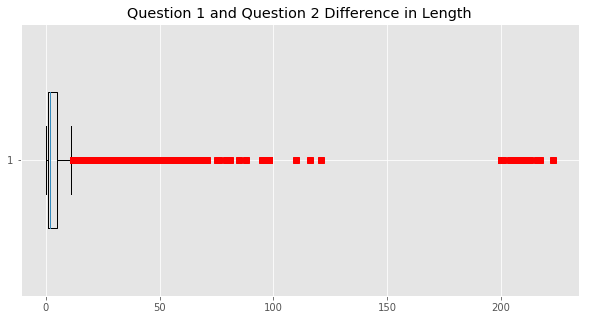

In [61]:
data = abs(train_data['q1l'] - train_data['q2l'])

plt.figure(figsize=[10,5])
plt.boxplot(data, 0, 'rs', 0, widths=[0.5])
plt.title("Question 1 and Question 2 Difference in Length")
plt.show()